In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import requests

from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import LancasterStemmer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
#Sentiment Analysis
afinn_wl_url = ('https://raw.githubusercontent.com'
                    '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')
afinn_wl_df = pd.read_csv(afinn_wl_url,
                              header=None, # no column names
                              sep='\t',  # tab sepeated
                              names=['term', 'value']) #new column names
    
af_wordlist = list(afinn_wl_df["term"])
def combination(text,af_wordlist):
    # Load the lexicons
    afinn = Afinn()
    analyzer = SentimentIntensityAnalyzer()

    # Create a dictionary of words and their sentiment scores from SentiWordNet
    # Define the weights for each lexicon
    weights = {'AFINN': 0.4, 'NLTK(VADER)': 0.6}

    
    
    # Define a function to calculate the sentiment score of a given text
    def sentiment_score(text):
        blob1 = TextBlob(text)
        tokenized_words = blob1.words
        final_words = []
        for w in tokenized_words:
            final_words.append(w)
        L_stemmed_words= []
        for w in final_words:
            s = LancasterStemmer()
            stem_word = s.stem(w)
            L_stemmed_words.append(stem_word)
        text = ' '.join(L_stemmed_words)	# convert back to text with spaces
        
        scored_words = []
        new_text = text.split()
        for word in new_text:
            if word in af_wordlist:
                scored_words.append(word)           
        if len(scored_words) != 0:   
            afinn_score = afinn.score(text)/len(scored_words)
        else:
            afinn_score = afinn.score(text)
            
        nltk_score = SentimentIntensityAnalyzer().polarity_scores(text)["compound"]
    
        score = (weights['AFINN'] * afinn_score +
                 weights['NLTK(VADER)'] * nltk_score)
        ans_dict = {"Score":score,"Afinn_Score":afinn_score,"NLKT(Vader Score)":nltk_score}
        return ans_dict
    return sentiment_score(text)["Score"]

In [60]:
df = pd.read_csv("scraped_tweets_eth.csv")
df

,Unnamed: 0,Datetime,Tweet Id,Text,Hashtags,Replies,Retweets,Count_of_Likes,Location,Co-ordinates
0,0,2022-07-26 23:59:57+00:00,1.552080e+18,#Ethereum Price : $1451.14 https://t.co/rVx6Cl...,['Ethereum'],0.0,0.0,0.0,NaN,NaN
1,1,2022-07-26 23:59:55+00:00,1.552080e+18,@ethereum_max hold &amp; wait $0.000088,NaN,0.0,0.0,0.0,NaN,NaN
2,2,2022-07-26 23:59:45+00:00,1.552080e+18,There isn't someone more afraid that Ethereum ...,NaN,1.0,0.0,7.0,NaN,NaN
3,3,2022-07-26 23:59:44+00:00,1.552080e+18,Ethereum alliance 😹,NaN,0.0,0.0,0.0,NaN,NaN
4,4,2022-07-26 23:59:42+00:00,1.552080e+18,@ERC20_News @AventusNetwork @ethereum I am gla...,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
51441,51439,2022-07-29 00:00:06+00:00,1.552810e+18,🪙 #Bitcoin (BTC) 23843.8$ (-0.508%)\n🪙 #Ethere...,"['Bitcoin', 'Ethereum', 'Tether', 'USD', 'BNB'...",0.0,0.0,0.0,NaN,NaN
51442,51440,2022-07-29 00:00:04+00:00,1.552810e+18,#EverRise $RISE #EverRiseV3 #EverRevoke #DeFi ...,"['EverRise', 'EverRiseV3', 'EverRevoke', 'DeFi...",0.0,1.0,2.0,NaN,NaN
51443,51441,2022-07-29 00:00:02+00:00,1.552810e+18,I can't wait for the moment #ethereum reaches ...,"['ethereum', 'NFT', 'NFTCommunity']",0.0,2.0,4.0,NaN,NaN
51444,51442,2022-07-29 00:00:01+00:00,1.552810e+18,Congrats to @tannerfanjoy5 ! Join our discord ...,"['DailyEthereumExplained', 'nft', 'web3', 'giv...",1.0,0.0,10.0,NaN,NaN


In [63]:
#M3 senti
comb_senti = []
comb_senti_score = []
for i in range(df.shape[0]):
    text = df.iloc[i]["Text"]
    try:
        senti_comb = combination(text,af_wordlist)
        comb_senti_score.append(senti_comb)
    except:
        senti_comb = 0
        comb_senti_score.append(senti_comb,af_wordlist)
    print(i)
comb_senti_score
for s in comb_senti_score:
    if s > 0.1:
        comb_senti.append("Positive")
    elif s < -0.1:
        comb_senti.append("Negative")
    else:
        comb_senti.append("Neutral")


#df["Lexicon(NLTK)"] = comb_senti
#df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [100]:
#df.to_csv("Jay_Eth_Senti.csv")

In [2]:
df["Lexicon(NLTK)"] = comb_senti
df

NameError: name 'comb_senti' is not defined

In [2]:
df = pd.read_csv("Jay_Eth_Senti.csv")
df

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Hashtags,Replies,Retweets,Count_of_Likes,Location,Co-ordinates,Lexicon(NLTK)
0,0,0,2022-07-26 23:59:57+00:00,1.552080e+18,#Ethereum Price : $1451.14 https://t.co/rVx6Cl...,['Ethereum'],0.0,0.0,0.0,NaN,NaN,Neutral
1,1,1,2022-07-26 23:59:55+00:00,1.552080e+18,@ethereum_max hold &amp; wait $0.000088,NaN,0.0,0.0,0.0,NaN,NaN,Neutral
2,2,2,2022-07-26 23:59:45+00:00,1.552080e+18,There isn't someone more afraid that Ethereum ...,NaN,1.0,0.0,7.0,NaN,NaN,Negative
3,3,3,2022-07-26 23:59:44+00:00,1.552080e+18,Ethereum alliance 😹,NaN,0.0,0.0,0.0,NaN,NaN,Neutral
4,4,4,2022-07-26 23:59:42+00:00,1.552080e+18,@ERC20_News @AventusNetwork @ethereum I am gla...,NaN,0.0,0.0,0.0,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
51441,51441,51439,2022-07-29 00:00:06+00:00,1.552810e+18,🪙 #Bitcoin (BTC) 23843.8$ (-0.508%)\n🪙 #Ethere...,"['Bitcoin', 'Ethereum', 'Tether', 'USD', 'BNB'...",0.0,0.0,0.0,NaN,NaN,Neutral
51442,51442,51440,2022-07-29 00:00:04+00:00,1.552810e+18,#EverRise $RISE #EverRiseV3 #EverRevoke #DeFi ...,"['EverRise', 'EverRiseV3', 'EverRevoke', 'DeFi...",0.0,1.0,2.0,NaN,NaN,Neutral
51443,51443,51441,2022-07-29 00:00:02+00:00,1.552810e+18,I can't wait for the moment #ethereum reaches ...,"['ethereum', 'NFT', 'NFTCommunity']",0.0,2.0,4.0,NaN,NaN,Positive
51444,51444,51442,2022-07-29 00:00:01+00:00,1.552810e+18,Congrats to @tannerfanjoy5 ! Join our discord ...,"['DailyEthereumExplained', 'nft', 'web3', 'giv...",1.0,0.0,10.0,NaN,NaN,Negative


In [3]:
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df

,Unnamed: 0,Datetime,Tweet Id,Text,Hashtags,Replies,Retweets,Count_of_Likes,Location,Co-ordinates,Lexicon(NLTK)
0,0,2022-07-26 23:59:57+00:00,1.552080e+18,#Ethereum Price : $1451.14 https://t.co/rVx6Cl...,['Ethereum'],0.0,0.0,0.0,NaN,NaN,Neutral
1,1,2022-07-26 23:59:55+00:00,1.552080e+18,@ethereum_max hold &amp; wait $0.000088,NaN,0.0,0.0,0.0,NaN,NaN,Neutral
2,2,2022-07-26 23:59:45+00:00,1.552080e+18,There isn't someone more afraid that Ethereum ...,NaN,1.0,0.0,7.0,NaN,NaN,Negative
3,3,2022-07-26 23:59:44+00:00,1.552080e+18,Ethereum alliance 😹,NaN,0.0,0.0,0.0,NaN,NaN,Neutral
4,4,2022-07-26 23:59:42+00:00,1.552080e+18,@ERC20_News @AventusNetwork @ethereum I am gla...,NaN,0.0,0.0,0.0,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...
51441,51439,2022-07-29 00:00:06+00:00,1.552810e+18,🪙 #Bitcoin (BTC) 23843.8$ (-0.508%)\n🪙 #Ethere...,"['Bitcoin', 'Ethereum', 'Tether', 'USD', 'BNB'...",0.0,0.0,0.0,NaN,NaN,Neutral
51442,51440,2022-07-29 00:00:04+00:00,1.552810e+18,#EverRise $RISE #EverRiseV3 #EverRevoke #DeFi ...,"['EverRise', 'EverRiseV3', 'EverRevoke', 'DeFi...",0.0,1.0,2.0,NaN,NaN,Neutral
51443,51441,2022-07-29 00:00:02+00:00,1.552810e+18,I can't wait for the moment #ethereum reaches ...,"['ethereum', 'NFT', 'NFTCommunity']",0.0,2.0,4.0,NaN,NaN,Positive
51444,51442,2022-07-29 00:00:01+00:00,1.552810e+18,Congrats to @tannerfanjoy5 ! Join our discord ...,"['DailyEthereumExplained', 'nft', 'web3', 'giv...",1.0,0.0,10.0,NaN,NaN,Negative


In [4]:
# Convert the 'Datetime' column to datetime format, and set non-datetime values to NaT
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df['Unnamed: 0'] = pd.to_numeric(df['Unnamed: 0'], errors='coerce')

# Drop rows where the 'Datetime' column is NaT (i.e., not a datetime value)
df.dropna(subset=['Datetime','Unnamed: 0'], inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Unnamed: 0,Datetime,Tweet Id,Text,Hashtags,Replies,Retweets,Count_of_Likes,Location,Co-ordinates,Lexicon(NLTK)
0,0.0,2022-07-26 23:59:57+00:00,1.552080e+18,#Ethereum Price : $1451.14 https://t.co/rVx6Cl...,['Ethereum'],0.0,0.0,0.0,NaN,NaN,Neutral
1,1.0,2022-07-26 23:59:55+00:00,1.552080e+18,@ethereum_max hold &amp; wait $0.000088,NaN,0.0,0.0,0.0,NaN,NaN,Neutral
2,2.0,2022-07-26 23:59:45+00:00,1.552080e+18,There isn't someone more afraid that Ethereum ...,NaN,1.0,0.0,7.0,NaN,NaN,Negative
3,3.0,2022-07-26 23:59:44+00:00,1.552080e+18,Ethereum alliance 😹,NaN,0.0,0.0,0.0,NaN,NaN,Neutral
4,4.0,2022-07-26 23:59:42+00:00,1.552080e+18,@ERC20_News @AventusNetwork @ethereum I am gla...,NaN,0.0,0.0,0.0,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...
51439,51439.0,2022-07-29 00:00:06+00:00,1.552810e+18,🪙 #Bitcoin (BTC) 23843.8$ (-0.508%)\n🪙 #Ethere...,"['Bitcoin', 'Ethereum', 'Tether', 'USD', 'BNB'...",0.0,0.0,0.0,NaN,NaN,Neutral
51440,51440.0,2022-07-29 00:00:04+00:00,1.552810e+18,#EverRise $RISE #EverRiseV3 #EverRevoke #DeFi ...,"['EverRise', 'EverRiseV3', 'EverRevoke', 'DeFi...",0.0,1.0,2.0,NaN,NaN,Neutral
51441,51441.0,2022-07-29 00:00:02+00:00,1.552810e+18,I can't wait for the moment #ethereum reaches ...,"['ethereum', 'NFT', 'NFTCommunity']",0.0,2.0,4.0,NaN,NaN,Positive
51442,51442.0,2022-07-29 00:00:01+00:00,1.552810e+18,Congrats to @tannerfanjoy5 ! Join our discord ...,"['DailyEthereumExplained', 'nft', 'web3', 'giv...",1.0,0.0,10.0,NaN,NaN,Negative


<Axes: ylabel='Sentiment(%)'>

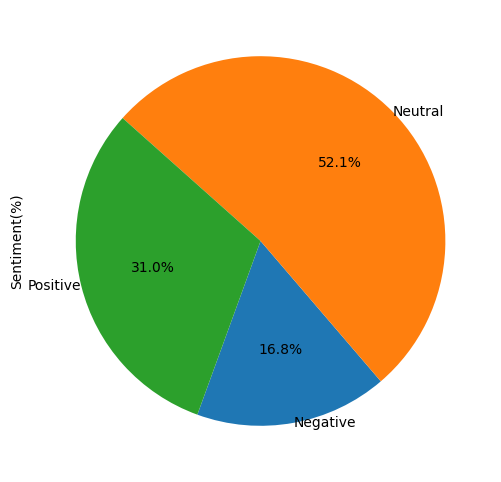

In [5]:
#Pie-Chart
sentis = df.groupby(['Lexicon(NLTK)']).size()
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentis.plot.pie(ax=ax, autopct='%1.1f%%', startangle=250, fontsize=10, labeldistance = 1, label="Sentiment(%)")

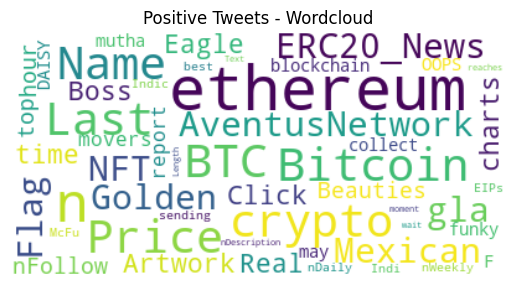

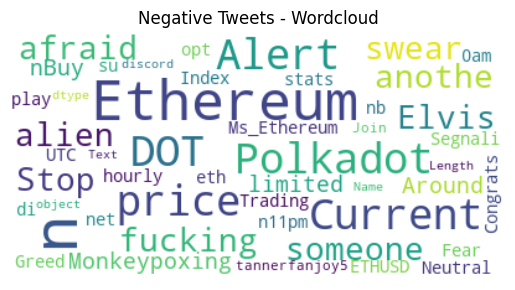

In [6]:
#Word Cloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = df['Text'][df["Lexicon(NLTK)"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
print("===============================================================================")
# Wordcloud with negative tweets
negative_tweets = df['Text'][df["Lexicon(NLTK)"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
#Max term Used
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]


tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt', 'via', '...']
tf = Counter()

# Loop through each row of the DataFrame and process the tweet text
for i, row in df.iterrows():
    tokens = process(text=row['Text'], tokenizer=tweet_tokenizer, stopwords=stopword_list)
    tf.update(tokens)

# Print the most common terms and plot the results
x_labels = []
for tag, count in tf.most_common(50):
    print("{}: {}".format(tag, count))
    x_labels.append(tag)
    
y = [count for tag, count in tf.most_common(50)]
fig = plt.figure(figsize=(8, 12))
x = x_labels
plt.barh(x, y)
plt.title("Sentiment")
plt.ylabel("Frequency")
#plt.savefig('Sentiment')

#ethereum: 28748
ethereum: 23430
price: 18188
#bitcoin: 13900
#eth: 12982
•: 12665
#crypto: 12441
last: 10953
eth: 10387
#btc: 8592
line: 7705
macd: 7637
#cryptocurrency: 7587
#nft: 5511
bitcoin: 5315
🚀: 5194
’: 4674
crypto: 4384
#blockchain: 4166
btc: 3963
signal: 3951
indicators: 3838
pivot: 3821
variation: 3812
s2: 3810
#nfts: 3592
daily: 3275
#cryptonews: 3139
#web3: 3134
merge: 3110
usd: 3005
#nftcommunity: 3004
follow: 2984
#altcoin: 2889
#defi: 2841
support: 2650
️: 2421
market: 2392
utc: 2371
since: 2284
):: 2274
nft: 2238
#binance: 2236
classic: 2222
resistance: 2178
updates: 2167
r2: 2103
middle: 1925
fibonacci: 1912
recent: 1911


Text(0, 0.5, 'Frequency')

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
import seaborn as sns

# Set the Datetime column as the index
df.set_index('Datetime', inplace=True)

# Resample the DataFrame to get the count of tweets per hour
tweets_per_hour = df.resample('H').count()['Tweet Id']

# Graph the tweets per hour using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=tweets_per_hour)
plt.xlabel('Date')
plt.ylabel('Number of Tweets per Hour')
plt.show()